# Interpreting ResNet Model With NormLIME

This notebook loads the pretrained ResNet model given by [PaddlePaddle Models](https://github.com/PaddlePaddle/models/tree/release/1.7) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using NormLIME algorithm, specifically the `NormLIMECVInterpreter` class.

If you have't done so, please first download the pretrained ResNet50 model from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [2]:
import paddle.fluid as fluid
import paddle
import numpy as np
import sys
from PIL import Image
import glob

sys.path.append('..')
import interpretdl as it
from interpretdl.data_processor.readers import preprocess_image, read_image
from assets.resnet import ResNet50

Define the `paddle_model` function that takes in images and return prediction probabilities. `ResNet50` is borrowed from PaddlePaddle image  classification [models](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification/models).

In [1]:
def paddle_model(data):
    class_num = 1000
    model = ResNet50()
    logits = model.net(input=data, class_dim=class_num)
    probs = fluid.layers.softmax(logits, axis=-1)
    return probs

Initialize the `NormLIMECVInterpreter`. 

In [3]:
MODEL_PATH = "../../ResNet50_pretrained"

normlime = it.NormLIMECVInterpreter(paddle_model, MODEL_PATH)

Before interpreting the image, we first take a look at the original images. 

Note: Here we only take 3 images for demonstration. More images should be used for better performance.

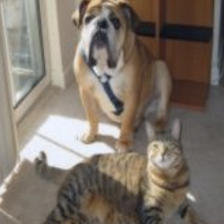

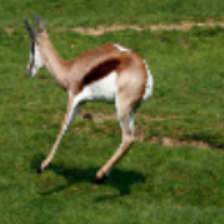

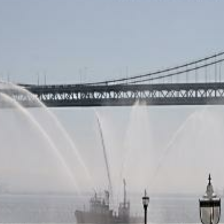

In [4]:
dataset_dir = "assets"
image_paths = sorted(glob.glob(dataset_dir + "/*.png"))

for image_path in image_paths:
    display(Image.fromarray(read_image(image_path)[0]))

Then, let NormLIME method help us `interpret` the image with respect to the predicted label. 

In [5]:
normlime_weights = normlime.interpret(image_paths, num_samples=2000, batch_size=50)

/root/anaconda3/envs/paddle/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator KMeans from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 3/3 [00:00<00:00, 9554.22it/s]



There are at least 555 classes, but the NormLIME has results of only 3 classes. 
It may have cause unstable results in the later computation but can be improved by computing more test samples.

